
# 逐步构建你的深度神经网络

欢迎来到第4周作业的第1部分！在此之前你已经训练了一个2层的神经网络（只有一个隐藏层）。本周，你将学会构建一个任意层数的深度神经网络！

    在此作业中，你将实现构建深度神经网络所需的所有函数。
    在下一个作业中，你将使用这些函数来构建一个用于图像分类的深度神经网络。

**完成此任务后，你将能够**：

    使用ReLU等非线性单位来改善模型
    建立更深的神经网络（具有1个以上的隐藏层）
    实现一个易于使用的神经网络类

让我们开始吧！
## 1 安装包

让我们首先导入作业过程中需要的所有包。

    numpy是Python科学计算的基本包。
    matplotlib是在Python中常用的绘制图形的库。
    dnn_utils为此笔记本提供了一些必要的函数。
    testCases提供了一些测试用例来评估函数的正确性
    np.random.seed（1）使所有随机函数调用保持一致。 这将有助于我们评估你的作业，请不要改变seed。



In [30]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import testCases
from dnn_utils import sigmoid, sigmoid_backward, relu, relu_backward
import lr_utils 
from lr_utils import load_dataset

np.random.seed(1)

## 2 作业大纲

为了构建你的神经网络，你将实现几个“辅助函数”。这些辅助函数将在下一个作业中使用，用来构建一个两层神经网络和一个L层的神经网络。你将实现的每个函数都有详细的说明，这些说明将指导你完成必要的步骤。此作业的大纲如下：

    初始化两层的网络和层的神经网络的参数。
    实现正向传播模块（在下图中以紫色显示）。
         - 完成模型正向传播步骤的LINEAR部分（）。
         - 提供使用的ACTIVATION函数（relu / Sigmoid）。
         - 将前两个步骤合并为新的[LINEAR-> ACTIVATION]前向函数。
         - 堆叠[LINEAR-> RELU]正向函数L-1次（第1到L-1层），并在末尾添加[LINEAR-> SIGMOID]（最后的层）。这合成了一个新的L_model_forward函数。
    计算损失。
    实现反向传播模块（在下图中以红色表示）。
        - 完成模型反向传播步骤的LINEAR部分。
        - 提供的ACTIVATE函数的梯度（relu_backward / sigmoid_backward）
        - 将前两个步骤组合成新的[LINEAR-> ACTIVATION]反向函数。
        - 将[LINEAR-> RELU]向后堆叠L-1次，并在新的L_model_backward函数中后向添加[LINEAR-> SIGMOID]
    最后更新参数。
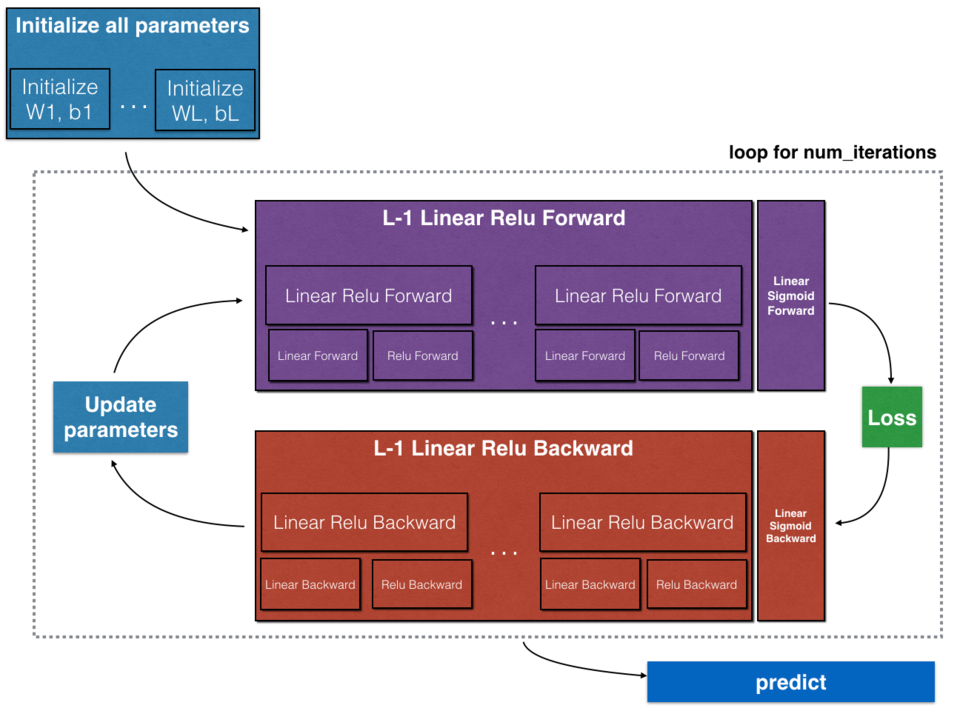
**注意**：对于每个正向函数，都有一个对应的反向函数。 这也是为什么在正向传播模块的每一步都将一些值存储在缓存中的原因。缓存的值可用于计算梯度。 然后，在反向传导模块中，你将使用缓存的值来计算梯度。 此作业将指导说明如何执行这些步骤。
## 3 初始化

首先编写两个辅助函数用来初始化模型的参数。 第一个函数将用于初始化两层模型的参数。 第二个将把初始化过程推广到层模型上。
### 3.1 2层神经网络

**练习**：创建并初始化2层神经网络的参数。

**说明**：

    模型的结构为：LINEAR -> RELU -> LINEAR -> SIGMOID。
    随机初始化权重矩阵。 确保准确的维度，使用np.random.randn（shape）* 0.01。
    将偏差初始化为0。 使用np.zeros（shape）。



In [4]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    parameters -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(1)
    
### START CODE HERE ### (≈ 4 lines of code)
    W1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros((n_y,1))
    ### END CODE HERE ###
    
    
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters    

In [5]:
parameters = initialize_parameters(2,2,1)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.01624345 -0.00611756]
 [-0.00528172 -0.01072969]]
b1 = [[0.]
 [0.]]
W2 = [[ 0.00865408 -0.02301539]]
b2 = [[0.]]


### 3.2 L层神经网络

更深的L层神经网络的初始化更加复杂，因为存在更多的权重矩阵和偏差向量。 完成 initialize_parameters_deep后，应确保各层之间的维度匹配。 

**练习**：实现L层神经网络的初始化。

**说明**：

    模型的结构为 [LINEAR -> RELU] (L-1) -> LINEAR -> SIGMOID。也就是说，层使用ReLU作为激活函数，最后一层采用sigmoid激活函数输出。
    随机初始化权重矩阵。使用np.random.rand（shape）* 0.01。
    零初始化偏差。使用np.zeros（shape）。
    我们将在不同的layer_dims变量中存储，即不同层中的神经元数。例如，上周“二维数据分类模型”的layer_dims为[2,4,1]：即有两个输入，一个隐藏层包含4个隐藏单元，一个输出层包含1个输出单元。因此，W1的维度为（4,2），b1的维度为（4,1），W2的维度为（1,4），而b2的维度为（1,1）。现在你将把它应用到层！
    这是 （一层神经网络）的实现。以启发你如何实现通用的神经网络（L层神经网络）。 

In [59]:
# GRADED FUNCTION: initialize_parameters_deep

def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        ### START CODE HERE ### (≈ 2 lines of code)
        parameters['W' + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1])/ np.sqrt(layers_dims[l - 1]) 
        parameters['b' + str(l)] = np.zeros((layer_dims[l],1))
        ### END CODE HERE ###
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters

In [7]:
parameters = initialize_parameters_deep([5,4,3])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.01788628  0.0043651   0.00096497 -0.01863493 -0.00277388]
 [-0.00354759 -0.00082741 -0.00627001 -0.00043818 -0.00477218]
 [-0.01313865  0.00884622  0.00881318  0.01709573  0.00050034]
 [-0.00404677 -0.0054536  -0.01546477  0.00982367 -0.01101068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01185047 -0.0020565   0.01486148  0.00236716]
 [-0.01023785 -0.00712993  0.00625245 -0.00160513]
 [-0.00768836 -0.00230031  0.00745056  0.01976111]]
b2 = [[0.]
 [0.]
 [0.]]



## 4 正向传播模块
### 4.1 线性正向

现在，你已经初始化了参数，接下来将执行正向传播模块。 首先实现一些基本函数，用于稍后的模型实现。按以下顺序完成三个函数：

    LINEAR
    LINEAR -> ACTIVATION，其中激活函数采用ReLU或Sigmoid。
    [LINEAR -> RELU] (L-1) -> LINEAR -> SIGMOID（整个模型）


**练习**：建立正向传播的线性部分。


In [8]:
# GRADED FUNCTION: linear_forward

def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python dictionary containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    Z = np.dot(W,A) + b
    ### END CODE HERE ###
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

In [10]:
A, W, b = testCases.linear_forward_test_case()

Z, linear_cache = linear_forward(A, W, b)
print("Z = " + str(Z))

Z = [[ 3.26295337 -1.23429987]]



4.2 正向线性激活

在此笔记本中，你将使用两个激活函数：

    Sigmoid：我们为你提供了“ Sigmoid”函数。 该函数返回两项值：激活值"a"和包含"Z"的"cache"（这是我们将馈入到相应的反向函数的内容）。 你可以按下述方式得到两项值：


ReLU：ReLu的数学公式为。我们为你提供了relu函数。 该函数返回两项值：激活值“A”和包含“Z”的“cache”（这是我们将馈入到相应的反向函数的内容）。 你可以按下述方式得到两项值：


为了更加方便，我们把两个函数（线性和激活）组合为一个函数（LINEAR-> ACTIVATION）。 因此，我们将实现一个函数用以执行LINEAR正向步骤和ACTIVATION正向步骤。

**练习**：实现 LINEAR->ACTIVATION 层的正向传播。 数学表达式为：，其中激活"g" 可以是sigmoid（）或relu（）。 使用linear_forward（）和正确的激活函数。


In [11]:
# GRADED FUNCTION: linear_activation_forward

def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python dictionary containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ### START CODE HERE ### (≈ 2 lines of code)
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = sigmoid(Z)
        ### END CODE HERE ###
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ### START CODE HERE ### (≈ 2 lines of code)
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = relu(Z)
        ### END CODE HERE ###
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [16]:
A_prev, W, b = testCases.linear_activation_forward_test_case()

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "sigmoid")
print("With sigmoid: A = " + str(A))

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "relu")
print("With ReLU: A = " + str(A))

With sigmoid: A = [[0.96890023 0.11013289]]
With ReLU: A = [[3.43896131 0.        ]]



**注意**：在深度学习中，"[LINEAR->ACTIVATION]"计算被视为神经网络中的单个层，而不是两个层。

### 4.3 L层模型

为了方便实现层神经网络，你将需要一个函数来复制前一个函数（使用RELU的linear_activation_forward）次，以及复制带有SIGMOID的linear_activation_forward。

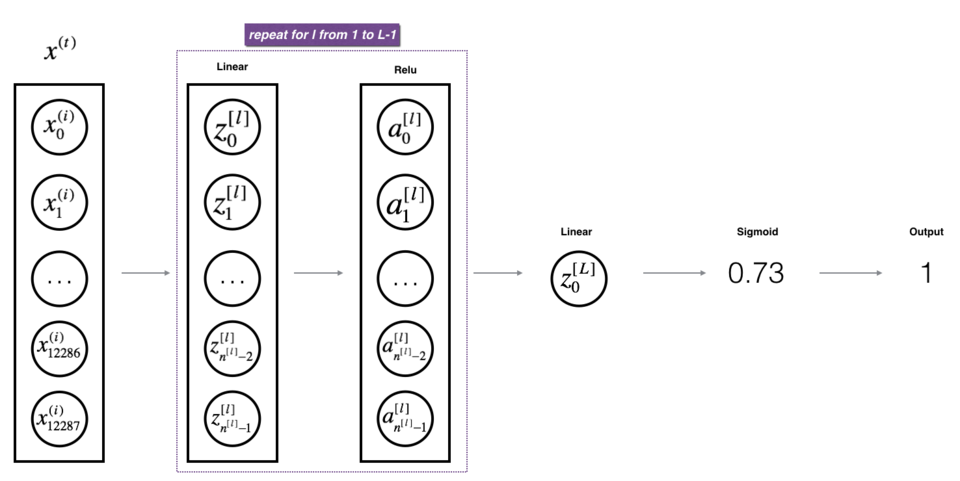

**练习**：实现上述模型的正向传播。

**说明**：在下面的代码中，变量AL表示（有时也称为Yhat，即。）

**提示**：

    使用你先前编写的函数
    使用for循环复制[LINEAR-> RELU]（L-1）次
    不要忘记在“cache”列表中更新缓存。 要将新值 c添加到list中，可以使用list.append(c)。


In [17]:
# GRADED FUNCTION: L_model_forward

def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_relu_forward() (there are L-1 of them, indexed from 0 to L-2)
                the cache of linear_sigmoid_forward() (there is one, indexed L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
         ### START CODE HERE ### (≈ 2 lines of code)
        A, cache = linear_activation_forward(A_prev,parameters['W' + str(l)],parameters['b' + str(l)],activation = "relu")
        caches.append(cache)
        ### END CODE HERE ###
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    ### START CODE HERE ### (≈ 2 lines of code)
    AL, cache = linear_activation_forward(A,parameters['W' + str(L)],parameters['b' + str(L)],activation = "sigmoid")
    caches.append(cache)
    ### END CODE HERE ###
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

In [18]:
X, parameters = testCases.L_model_forward_test_case()
AL, caches = L_model_forward(X, parameters)
print("AL = " + str(AL))
print("Length of caches list = " + str(len(caches)))

AL = [[0.17007265 0.2524272 ]]
Length of caches list = 2




现在，你有了一个完整的正向传播模块，它接受输入X并输出包含预测的行向量。 它还将所有中间值记录在"caches"中以计算预测的损失值。
## 5 损失函数

现在，你将实现模型的正向和反向传播。 你需要计算损失，以检查模型是否在学习。

**练习**：使用以下公式计算交叉熵损失：

In [19]:
# GRADED FUNCTION: compute_cost

def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    
    m = Y.shape[1]

    # Compute loss from aL and y.
    ### START CODE HERE ### (≈ 1 lines of code)
    cost = -1 / m * np.sum(Y * np.log(AL) + (1-Y) * np.log(1-AL),axis=1,keepdims=True)
    ### END CODE HERE ###
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost

In [20]:
Y, AL = testCases.compute_cost_test_case()

print("cost = " + str(compute_cost(AL, Y)))

cost = 0.41493159961539694


## 6 反向传播模块

就像正向传播一样，你将实现辅助函数以进行反向传播。 请记住，反向传播用于计算损失函数相对于参数的梯度。

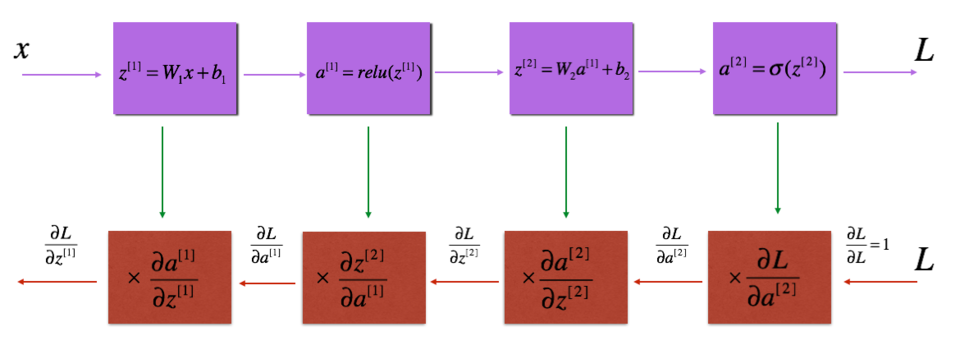

LINEAR->RELU->LINEAR->SIGMOID 的正向和反向传播，紫色块代表正向传播，红色块代表反向传播。

对于那些精通微积分的人（不必进行此作业），可以使用微积分的链式规则来得出2层网络中的损失 相对于 的导数，如下所示：

为了计算梯度，请使用上一个链规则，然后执行。 在反向传播的每个步骤中，你都将当前梯度乘以对应层的梯度，以获得所需的梯度。

同样地，为了计算梯度，你使用前一个链规则，然后执行。

这也是为什么我们称之为反向传播。

现在，类似于正向传播，你将分三个步骤构建反向传播：

    LINEAR backward
    LINEAR -> ACTIVATION backward，其中激活函数使用ReLU或sigmoid 的导数计算
    [LINEAR -> RELU] (L-1) -> LINEAR -> SIGMOID backward（整个模型）


### 6.1 线性反向

In [21]:
# GRADED FUNCTION: linear_backward

def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]
   ### START CODE HERE ### (≈ 3 lines of code)
    dW = 1 / m * np.dot(dZ ,A_prev.T)
    db = 1 / m * np.sum(dZ,axis = 1 ,keepdims=True)
    dA_prev = np.dot(W.T,dZ) 
    ### END CODE HERE ###
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [22]:
# Set up some test inputs
dZ, linear_cache = testCases.linear_backward_test_case()

dA_prev, dW, db = linear_backward(dZ, linear_cache)
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

dA_prev = [[ 0.51822968 -0.19517421]
 [-0.40506361  0.15255393]
 [ 2.37496825 -0.89445391]]
dW = [[-0.10076895  1.40685096  1.64992505]]
db = [[0.50629448]]



### 6.2 反向线性激活

接下来，创建一个合并两个辅助函数的函数：linear_backward 和反向步骤的激活 linear_activation_backward。

为了帮助你实现linear_activation_backward，我们提供了两个反向函数：

    sigmoid_backward：实现SIGMOID单元的反向传播。 你可以这样使用：

dZ = sigmoid_backward(dA, activation_cache)

    relu_backward：实现RELU单元的反向传播。 你可以这样使用：

dZ = relu_backward(dA, activation_cache)

如果是激活函数，
sigmoid_backward和relu_backward计算。

**练习**：实现LINEAR->ACTIVATION 层的反向传播。


In [23]:
# GRADED FUNCTION: linear_activation_backward

def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        ### START CODE HERE ### (≈ 2 lines of code)
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        ### END CODE HERE ###
        
    elif activation == "sigmoid":
        ### START CODE HERE ### (≈ 2 lines of code)
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        ### END CODE HERE ###
    
    return dA_prev, dW, db

In [24]:
AL, linear_activation_cache = testCases.linear_activation_backward_test_case()

dA_prev, dW, db = linear_activation_backward(AL, linear_activation_cache, activation = "sigmoid")
print ("sigmoid:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db) + "\n")

dA_prev, dW, db = linear_activation_backward(AL, linear_activation_cache, activation = "relu")
print ("relu:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

sigmoid:
dA_prev = [[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]]
dW = [[ 0.10266786  0.09778551 -0.01968084]]
db = [[-0.05729622]]

relu:
dA_prev = [[ 0.44090989 -0.        ]
 [ 0.37883606 -0.        ]
 [-0.2298228   0.        ]]
dW = [[ 0.44513824  0.37371418 -0.10478989]]
db = [[-0.20837892]]


### 6.3 反向L层模型

现在，你将为整个网络实现反向传播函数。 回想一下，当你实现L_model_forward函数时，在每次迭代中，你都存储了一个包含（X，W，b和z）的缓存。 在反向传播模块中，你将使用这些变量来计算梯度。 因此，在L_model_backward函数中，你将从层开始向后遍历所有隐藏层。在每个步骤中，你都将使用层的缓存值反向传播到层。 下图展示了反向传播过程。

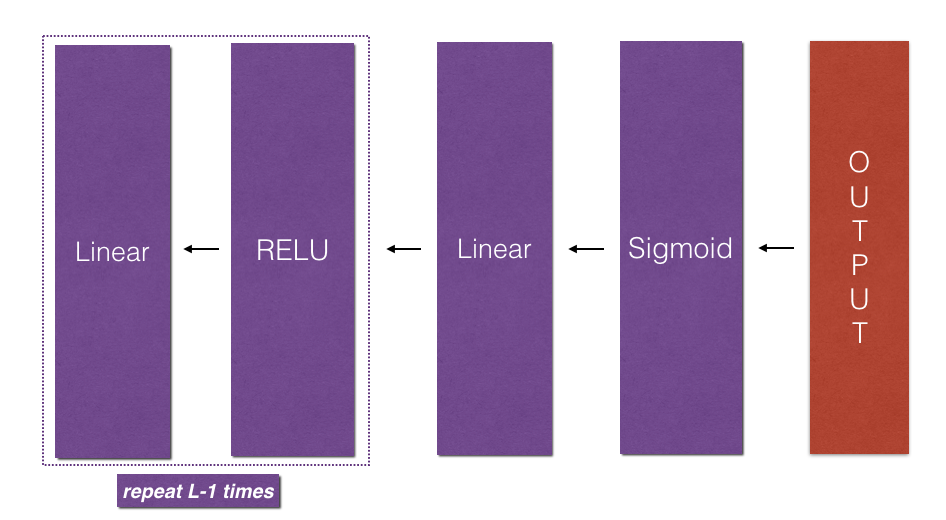

初始化反向传播：
为了使网络反向传播，我们知道输出是
。因此，你的代码需要计算dAL 。
为此，请使用以下公式（不需要深入的微积分知识）：

然后，你可以使用此激活后的梯度dAL继续反向传播。如图5所示，你现在可以将dAL输入到你实现的LINEAR-> SIGMOID反向函数中（它将使用L_model_forward函数存储的缓存值）。之后，你得通过for循环，使用LINEAR-> RELU反向函数迭代所有其他层。同时将每个dA，dW和db存储在grads词典中。

**练习**：实现 [LINEAR->RELU] (L-1) -> LINEAR -> SIGMOID 模型的反向传播。

In [25]:
# GRADED FUNCTION: L_model_backward

def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ...
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ...
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL

    # Initializing the backpropagation
    ### START CODE HERE ### (1 line of code)
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    ### END CODE HERE ###
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "AL, Y, caches". Outputs: "grads["dAL"], grads["dWL"], grads["dbL"]
    ### START CODE HERE ### (approx. 2 lines)
    current_cache = caches[L-1]
    grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "sigmoid")
    ### END CODE HERE ###
      
    for l in reversed(range(L - 1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 2)], caches". Outputs: "grads["dA" + str(l + 1)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        ### START CODE HERE ### (approx. 5 lines)
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l+2)], current_cache, activation = "relu")
        grads["dA" + str(l + 1)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
        ### END CODE HERE ###


    return grads

In [26]:
AL, Y_assess, caches = testCases.L_model_backward_test_case()
grads = L_model_backward(AL, Y_assess, caches)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dA1 = "+ str(grads["dA1"]))

dW1 = [[0.41010002 0.07807203 0.13798444 0.10502167]
 [0.         0.         0.         0.        ]
 [0.05283652 0.01005865 0.01777766 0.0135308 ]]
db1 = [[-0.22007063]
 [ 0.        ]
 [-0.02835349]]
dA1 = [[ 0.          0.52257901]
 [ 0.         -0.3269206 ]
 [ 0.         -0.32070404]
 [ 0.         -0.74079187]]



### 6.4 更新参数

在本节中，你将使用梯度下降来更新模型的参数.

**练习**：实现update_parameters（）以使用梯度下降来更新模型参数。


In [27]:
# GRADED FUNCTION: update_parameters

def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    ### START CODE HERE ### (≈ 3 lines of code)
    for l in range(L):
        parameters["W" + str(l+1)] =  parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l + 1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l + 1)]
    ### END CODE HERE ###
        
    return parameters

In [28]:
parameters, grads = testCases.update_parameters_test_case()
parameters = update_parameters(parameters, grads, 0.1)

print ("W1 = "+ str(parameters["W1"]))
print ("b1 = "+ str(parameters["b1"]))
print ("W2 = "+ str(parameters["W2"]))
print ("b2 = "+ str(parameters["b2"]))

W1 = [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]]
b1 = [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]]
W2 = [[-0.55569196  0.0354055   1.32964895]]
b2 = [[-0.84610769]]



## 7 结论

恭喜你实现了构建深度神经网络所需的所有函数！

我们知道这是一项艰巨的任务，但是继续前进将变得更好。 下一部分的作业相对容易。

在下一个作业中，你将使用这些函数构建两个模型用于分类猫图像和非猫图像：

    两层神经网络
    L层神经网络




# 深度神经网络应用--图像分类

完成此作业后，你将完成第4周最后的编程任务，也是本课程最后的编程任务！

你将使用在上一个作业中实现的函数来构建深层网络，并将其应用于分类cat图像和非cat图像。 希望你会看到相对于先前的逻辑回归实现的分类，准确性有所提高。

**完成此任务后，你将能够**：

    建立深度神经网络并将其应用于监督学习。

让我们开始吧！


## 数据集

你将使用与“用神经网络思想实现Logistic回归”（作业2）中相同的“cats vs non-cats”数据集。 此前你建立的模型在对猫和非猫图像进行分类时只有70％的准确率。 希望你的新模型会更好！

**问题说明**：你将获得一个包含以下内容的数据集（"data.h5"）：
     - 标记为cat（1）和非cat（0）图像的训练集m_train
     - 标记为cat或non-cat图像的测试集m_test
     - 每个图像的维度都为（num_px，num_px，3），其中3表示3个通道（RGB）。

让我们熟悉一下数据集吧， 首先通过运行以下代码来加载数据。

In [50]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_dataset()

运行以下代码以展示数据集中的图像。 通过更改索引，然后重新运行单元以查看其他图像。

y = 1. It's a cat picture.


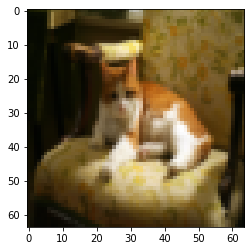

In [51]:
# Example of a picture
index = 7
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [52]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


与往常一样，在将图像输入到网络之前，需要对图像进行重塑和标准化。 下面单元格给出了相关代码。

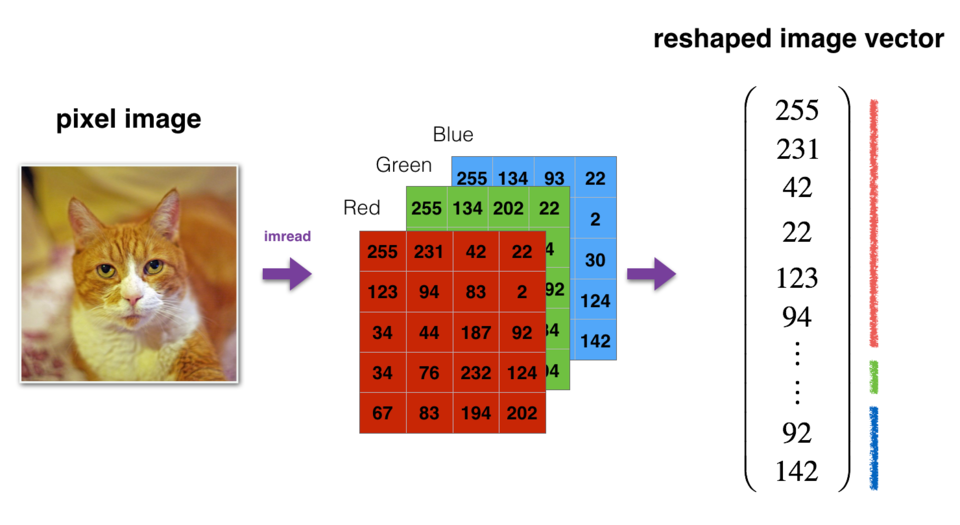

In [53]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)



## 1 模型的结构

现在你已经熟悉了数据集，是时候建立一个深度神经网络来区分猫图像和非猫图像了。

你将建立两个不同的模型：

    2层神经网络
    L层深度神经网络

然后，你将比较这些模型的性能，并尝试不同的L值。

让我们看一下两种架构。

### 1.1 2层神经网络
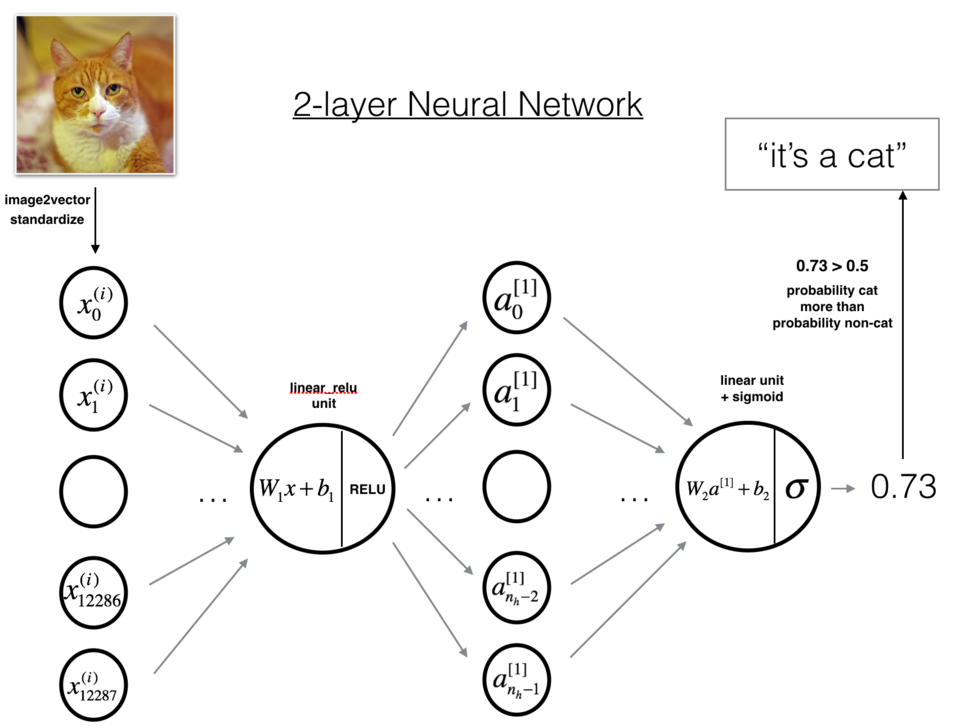
该模型可以总结为：INPUT -> LINEAR -> RELU -> LINEAR -> SIGMOID -> OUTPUT

我们正式开始构建两层的神经网络:

In [54]:
# GRADED FUNCTION: two_layer_model

def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    ### START CODE HERE ### (≈ 1 line of code)
    parameters = initialize_parameters(n_x, n_h, n_y)
    ### END CODE HERE ###
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1". Output: "A1, cache1, A2, cache2".
        ### START CODE HERE ### (≈ 2 lines of code)
        A1, cache1 =linear_activation_forward(X, W1, b1, activation = "relu")
        A2, cache2 = linear_activation_forward(A1, W2, b2, activation = "sigmoid")
        ### END CODE HERE ###
        
        # Compute cost
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(A2, Y)
        ### END CODE HERE ###
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        ### START CODE HERE ### (≈ 2 lines of code)
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation = "sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, activation = "relu")
        ### END CODE HERE ###
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        ### START CODE HERE ### (approx. 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
       
    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.693049735659989
Cost after iteration 100: 0.6464320953428849
Cost after iteration 200: 0.6325140647912677
Cost after iteration 300: 0.6015024920354665
Cost after iteration 400: 0.5601966311605747
Cost after iteration 500: 0.5158304772764729
Cost after iteration 600: 0.47549013139433266
Cost after iteration 700: 0.4339163151225749
Cost after iteration 800: 0.40079775362038866
Cost after iteration 900: 0.3580705011323798
Cost after iteration 1000: 0.3394281538366413
Cost after iteration 1100: 0.3052753636196264
Cost after iteration 1200: 0.2749137728213015
Cost after iteration 1300: 0.2468176821061484
Cost after iteration 1400: 0.1985073503746611
Cost after iteration 1500: 0.17448318112556663
Cost after iteration 1600: 0.17080762978097372
Cost after iteration 1700: 0.113065245621647
Cost after iteration 1800: 0.09629426845937149
Cost after iteration 1900: 0.08342617959726865
Cost after iteration 2000: 0.07439078704319085
Cost after iteration 2100: 0.066307481322

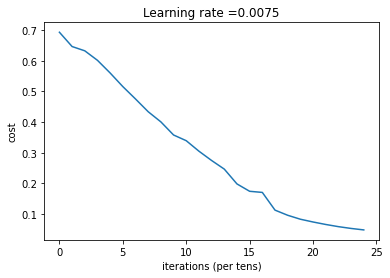

In [55]:
n_x = 12288
n_h = 7
n_y = 1
layers_dims = (n_x,n_h,n_y)

parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)



你构建了向量化的实现！ 否则，可能需要花费10倍的时间来训练它。

迭代完成之后我们就可以进行预测了，预测函数如下：


In [56]:
def predict(X, y, parameters):
    """
    该函数用于预测L层神经网络的结果，当然也包含两层
    
    参数：
     X - 测试集
     y - 标签
     parameters - 训练模型的参数
    
    返回：
     p - 给定数据集X的预测
    """
    
    m = X.shape[1]
    n = len(parameters) // 2 # 神经网络的层数
    p = np.zeros((1,m))
    
    #根据参数前向传播
    probas, caches = L_model_forward(X, parameters)
    
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    print("准确度为: "  + str(float(np.sum((p == y))/m)))
        
    return p

预测函数构建好了我们就开始预测，查看训练集和测试集的准确性：

In [43]:
predictions_train = predict(train_x, train_y, parameters)

predictions_test = predict(test_x, test_y, parameters)

准确度为: 1.0
准确度为: 0.72


### 1.2 搭建多层神经网络

该模型可以总结为：[LINEAR -> RELU] (L-1) -> LINEAR -> SIGMOID

In [60]:
# GRADED FUNCTION: L_layer_model

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization.
    ### START CODE HERE ###
    parameters = initialize_parameters_deep(layers_dims)
    ### END CODE HERE ###
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        ### START CODE HERE ### (≈ 1 line of code)
        AL, caches = L_model_forward(X, parameters)
        ### END CODE HERE ###
        
        # Compute cost.
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(AL, Y)
        ### END CODE HERE ###
    
        # Backward propagation.
        ### START CODE HERE ### (≈ 1 line of code)
        grads = L_model_backward(AL, Y, caches)
        ### END CODE HERE ###
 
        # Update parameters.
        ### START CODE HERE ### (≈ 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.715732
Cost after iteration 100: 0.674738
Cost after iteration 200: 0.660337
Cost after iteration 300: 0.646289
Cost after iteration 400: 0.629813
Cost after iteration 500: 0.606006
Cost after iteration 600: 0.569004
Cost after iteration 700: 0.519797
Cost after iteration 800: 0.464157
Cost after iteration 900: 0.408420
Cost after iteration 1000: 0.373155
Cost after iteration 1100: 0.305724
Cost after iteration 1200: 0.268102
Cost after iteration 1300: 0.238725
Cost after iteration 1400: 0.206323
Cost after iteration 1500: 0.179439
Cost after iteration 1600: 0.157987
Cost after iteration 1700: 0.142404
Cost after iteration 1800: 0.128652
Cost after iteration 1900: 0.112443
Cost after iteration 2000: 0.085056
Cost after iteration 2100: 0.057584
Cost after iteration 2200: 0.044568
Cost after iteration 2300: 0.038083
Cost after iteration 2400: 0.034411


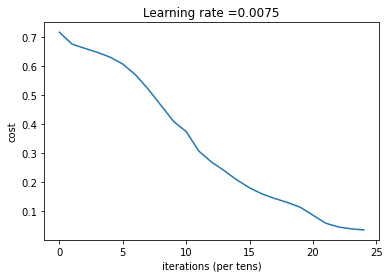

In [61]:
layers_dims = [12288, 20, 7, 5, 1] #  5-layer model
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)

训练完成，我们看一下预测：

In [62]:
pred_train = predict(train_x, train_y, parameters) #训练集
pred_test = predict(test_x, test_y, parameters) #测试集

准确度为: 0.9952153110047847
准确度为: 0.78


Good！在相同的测试集上，你的5层的神经网络似乎比2层神经网络具有更好的性能（78％）。做的好！

在下一作业教程“改善深度神经网络”中，你将学习如何通过系统地匹配更好的超参数（学习率，层数，迭代次数以及下一门课程中还将学习到的其他参数）来获得更高的准确性。


## 结果分析

首先，让我们看一下L层模型标记错误的一些图像。 这将显示一些分类错误的图像。


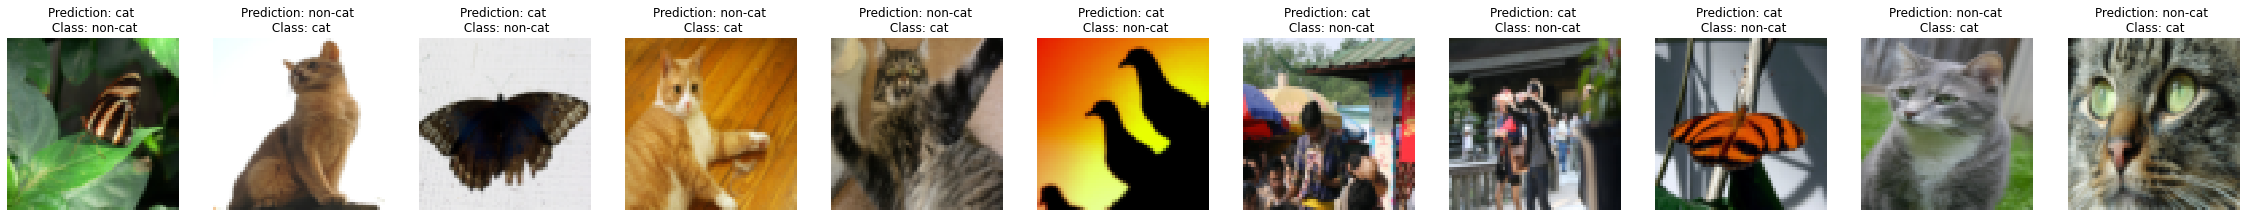

In [64]:
def print_mislabeled_images(classes, X, y, p):
    """
	绘制预测和实际不同的图像。
	    X - 数据集
	    y - 实际的标签
	    p - 预测
    """
    a = p + y
    mislabeled_indices = np.asarray(np.where(a == 1))
    plt.rcParams['figure.figsize'] = (40.0, 40.0) # set default size of plots
    num_images = len(mislabeled_indices[0])
    for i in range(num_images):
        index = mislabeled_indices[1][i]
        
        plt.subplot(2, num_images, i + 1)
        plt.imshow(X[:,index].reshape(64,64,3), interpolation='nearest')
        plt.axis('off')
        plt.title("Prediction: " + classes[int(p[0,index])].decode("utf-8") + " \n Class: " + classes[y[0,index]].decode("utf-8"))


print_mislabeled_images(classes, test_x, test_y, pred_test)



该模型在表现效果较差的的图像包括：

    猫身处于异常位置
    图片背景与猫颜色类似
    猫的种类和颜色稀有
    相机角度
    图片的亮度
    比例变化（猫的图像很大或很小）

